<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Decision trees with sklearn
© ExploreAI Academy

In this notebook, we will delve into the fundamentals of decision trees and how to implement them using sklearn. We'll cover how decision trees work, the training process, and practical implementation with Python's sklearn library. We will explore the decision-making process, partitioning data, and evaluating model performance.

## Learning objectives

By the end of this notebook, you should be able to:
* Understand the conceptual structure and functionality of decision trees for regression.
* Train a decision tree model using sklearn.
* Implement recursive binary splitting to partition data effectively.
* Evaluate model performance using mean squared error (MSE).
* Visualise decision tree models.


## Introduction

Before we build our first tree, it's important to understand _what_ decision trees are and _how_ they work. Below is a diagram showing the conceptual structure of a decision tree.
#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/master/decision_tree_diag.png?raw=true"  style="width:450px";/>
</div>

In simple terms, decision trees are tree-like machine learning models which represent data by partitioning it into different sections based on questions asked of predictive variables in the data. 

To make a decision on a new input:

1. We start at the **root node**, which is at the top of an upside-down tree.
2. Ask questions at each **decision node** about the attributes of the input.
3. Repeat 2. until we reach a **terminal node** (also known as a leaf node) at the bottom of the upside-down tree.


Each terminal node in the tree contains a potential output (i.e. $Y$ value) for a given input, $X$. The $Y$ value at a terminal node only becomes the output of our decision tree if the path of decisions on an input $X$ from the root node leads to that particular terminal node.

Consider the following example of a new data point $X$ with a value of 4.5. If we wanted to predict the $Y$ value for this new data point, the path that the input would follow along the decision tree is shown in green below:
#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/master/decision_tree_path.png?raw=true"  style="width:350px";/>
</div>


After following the path highlighted in green, the data point would eventually be assigned a value of $Y = 2$.   

So now we know how to _follow_ a decision tree. But where did the values of the split points come from, and how do we know how many `branches` the tree should have?

In the decision process, data points start at the root node and end at a terminal node. The training process follows the same pattern.   

In training a decision tree, we begin with all of our training data at the root node and then partition the data into smaller subsets which form the `branches` of the tree.   

When partitioning the data, two questions need to be answered:

1. Which predictor variable should be used as the split criterion?

2. What value of the predictor variable should be used as the splitting point?

### Partitioning

Partitioning occurs at every node in a regression tree through a method known as **recursive binary splitting**, employing the following approach:

1. **For** each predictor variable **do the following**: 

    1.1. Evaluate all potential binary data splits, as demonstrated below using Python slicing syntax:
    
| Left split             | Right split            |
|------------------------|------------------------|
| x[0]                   | x[1:]                  |
| x[:1]                  | x[2:]                  |
| x[:2]                  | x[3:]                  |
| $\qquad \huge \dots$   | $\qquad \huge \dots$   |
| x[:-2]                 | x[-1]                  |
    
   1.2. Select the data split that maximises data separation, depicted in the figure below.

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/master/splitting_1.png?raw=true"  style="width:350px";/>
</div>

_The optimal split point is determined by its ability to effectively separate the data. For each side of the split (i.e. at a specific value of the predictor variable), the mean $y$ value of the subset is calculated, enabling the computation of the **mean squared error** (MSE). The split point with the minimal MSE on both sides is chosen as the best split._

2. Compare the best splits across all predictor variables and select the **optimal** one.

3. Divide the data into two subsets based on the selected split.

4. Repeat steps 1 to 3 for all subsets until reaching a desired stopping criterion.

Following multiple splits, the final partitions may resemble the diagram depicted below:

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/master/splitting_2.png?raw=true"  style="width:350px";/>
</div>


## Examples

### Example 1: Visualise the data

So now that we have an understanding of how decision trees work, let's implement one using sklearn.

Suppose we are tasked with the problem of predicting the price of a house given its area using a dataset called `house_price_by_area`.

This dataset contains information on the `LotArea` (in square meters) and the corresponding `SalePrice` (in Rands) of properties.

We'll start by importing some commonly used Python libraries and loading our data.

In [1]:
import numpy as np  # used for mathematical operations
import pandas as pd  # for loading CSV data
import matplotlib.pyplot as plt  # for plotting data

In [2]:
df = pd.read_csv("https://github.com/Explore-AI/Public-Data/blob/master/house_price_by_area.csv?raw=true")
df.head()

,LotArea,SalePrice
0,138,1204000
1,145,1274000
2,152,1673000
3,152,1232000
4,152,1195600


We will be using the value of `LotArea` (independent variable) to try and predict the `SalePrice` (dependent variable).   

Let's take a look at the data using `matplotlib`.

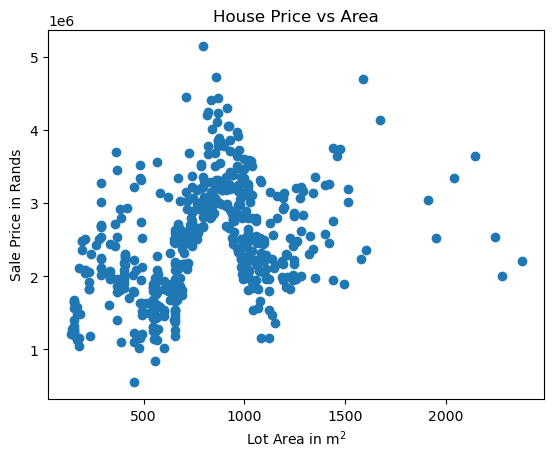

In [3]:
X = df["LotArea"] # independent variable
y = df["SalePrice"] # dependent variable

plt.scatter(X,y) # create scatter plot
plt.title("House Price vs Area")
plt.xlabel("Lot Area in m$^2$")
plt.ylabel("Sale Price in Rands")
plt.show()

### Example 2: Train-test split
Next we split our dataset into training and testing sets so that we can later evaluate the performance of the model.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Convert X to a numpy array and then reshape it to add a new axis
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=42)

### Example 3: Building the decision tree

Let's import the `DecisionTreeRegressor` class from the tree module of the sklearn library which will help us fit a decision tree to our dataset.

In [6]:
from sklearn.tree import DecisionTreeRegressor

After importing our Decision Tree Regressor model, we have to instantiate the model. This step also allows us to set model hyperparameters such as:

- **max_depth**: The maximum depth of the tree (i.e. the number of nodes between root and leaf node).
- **criterion**: The function to measure the quality of a split. The model uses the mean squared error (mse) by default.
- **random_state**: A number used to seed the random number generator. Ensures that we get the same tree each time we call model.fit(); among other hyperparameters.

To learn more about other DecisionTreeRegressor hyperparameters and descriptions, run `help(DecisionTreeRegressor)` in a new cell.

In [7]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)

As with most sklearn models, we call `.fit()` to train our model.

In [8]:
regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

`sklearn` provides a useful feature for visualising a fitted decision tree model. We can access it by importing the `plot_tree` method from the `sklearn.tree` submodule. Take note of the split points for the `LotArea` variable, as well as the MSE values and the number of samples in each subset.

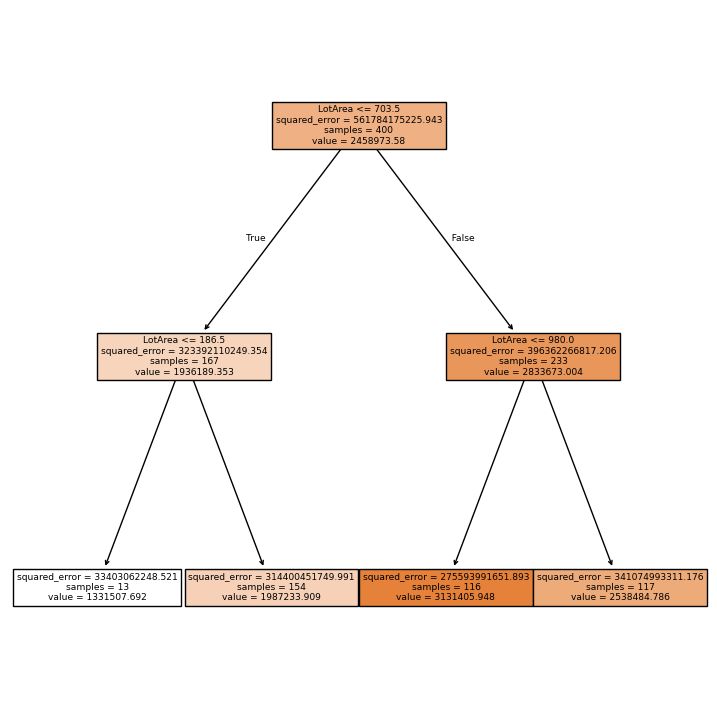

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(9,9))
# assigned a random variable name to the plot to suppress text output
_ = plot_tree(regr_tree, feature_names=['LotArea'],  filled=True)

At this point, we have a fully trained decision tree model and can easily make predictions by calling the `.predict` method.

### Example 4: Evaluating model performance

We evaluate model performance by comparing the model's predictions on unseen data `(x_test)` with the actual output `(y_test)`. This comparison helps assess how well the model generalises to new data and provides insights into its predictive accuracy. We will use `mean_squared_error` for this.

In [12]:
from sklearn.metrics import mean_squared_error
# get predictions for test data
y_pred = regr_tree.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_test, y_pred)

# Report RMSE
print("Regression decision tree model RMSE is:",np.sqrt(MSE))

Regression decision tree model RMSE is: 625573.2843752672


### Example 5: Visualising model output


One way to visualise a regression decision tree model is to obtain predictions $\hat{y}$ for a range of $x$ values and then plot the resulting step function. In this case, we can define our domain as a set of equidistant points along the $x$-axis, spanning from the minimum to the maximum $x$-values in the dataset. This approach captures the segmented nature of the decision tree predictions, where each segment corresponds to a different region of the predictor variable space determined by the splits in the tree.

In [13]:

# Generate a range of equidistant points along the x-axis spanning from the minimum
# to the maximum X-values in the dataset, consisting of 100 points.
x_domain = np.linspace(min(X), max(X), 100)[:, np.newaxis] 

In [14]:
# predict y for every point in x-domain
y_predictions = regr_tree.predict(x_domain)

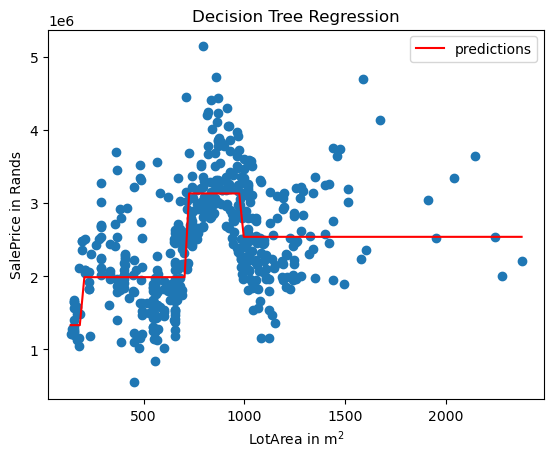

In [15]:
# plot the regression tree line over data
plt.figure()
plt.scatter(X, y)
plt.plot(x_domain, y_predictions, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In a step function plot, the model's predictions are represented by discrete steps rather than smooth curves. Each step corresponds to a particular interval or region defined by the predictor variables in the dataset.

The abrupt transitions between steps indicate where the model changes its prediction based on the splitting criteria learned during training. These transitions represent the decision boundaries of the tree, where the predictor variables are partitioned into subsets.

### Advantages and disadvantages of decision trees

Advantages:

* Easy to understand and use.
* Capable of handling both categorical and numerical data.
* Resilient to outliers, requiring minimal data preprocessing.
* Flexible for incorporating new features and can be extended to build larger classifiers using ensemble methods.

Disadvantages:

* Prone to overfitting, especially with complex datasets.
* Requires careful parameter tuning to optimise performance.
* Susceptible to bias if certain classes dominate the dataset.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>